<a href="https://colab.research.google.com/github/jfgf11/Problema-Especial/blob/master/Problema_Especial_Nuestro_Oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive

In [0]:
#Se monta el Drive para importar y guardar los datos y modelos.
from google.colab import drive
drive.mount('/content/drive')#,force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Se instalan las librerias necesarias
!pip install librosa
!pip install progressbar2

# Importar

In [0]:
# Tensor Flow
import tensorflow.compat.v1 as tf
# Tensor Flow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization

from IPython.display import SVG

# Recopilacion de datos
import xml.dom.minidom
import numpy as np

# Para el preprocesamiento
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

import librosa
import progressbar

# Import libraries 
from matplotlib.pyplot import specgram
from sklearn.metrics import confusion_matrix
from scipy import signal
from scipy.fft import fftshift

#Redes neuronales sklearn

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.utils.class_weight import compute_class_weight

tf.disable_v2_behavior()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Funciones

### Ruta en la que se guardan los archivos

Siempre se debe ejecutar la siguiente celda de código

In [0]:
def dar_ruta(carpeta, str_variable, Inicial_pNXML, Final_pNXML,
             ventana_Tiempo_string,
             sample_rate, Sin_Background, Solo_Background, Espectogram_, MFCC_,acoplados):

    sample_rate_String = str(sample_rate)
    if str_variable=='y_':
        MFCC_,Espectogram_=False,False
    if Sin_Background:
        Back = "_SIN_BACK"
    elif Solo_Background:
        Back = "_SOLO_BACK"
    else:
        Back = ""
    if Espectogram_:
        Esp_o_Mfcc = "_spectrogram"
    elif MFCC_:
        Esp_o_Mfcc = "_MFCC"
    else:
        Esp_o_Mfcc = ""

    
    if acoplados:
        ruta = carpeta + 'Acoplados/'+str_variable \
           + str(Inicial_pNXML) + "-" + str(Final_pNXML) + "_Audios_"\
           + ventana_Tiempo_string + "ms_" + sample_rate_String + Back + Esp_o_Mfcc
    else:
        ruta = carpeta + str_variable \
           + str(Inicial_pNXML) + "-" + str(Final_pNXML) + "_Audios_" \
           + ventana_Tiempo_string + "ms_" + sample_rate_String + Back + Esp_o_Mfcc

    return ruta

### Resultados

In [0]:
# De los creadores de EntrenamientoModelo*
def graficarMatrizConfusion(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  

  plt.figure(figsize=(8,8))

  ax = sns.heatmap(cm, annot = True, cbar = False);
      
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')
      
  plt.xlabel("Clase Prediccion")
  plt.ylabel("Clase Verdadera")
  plt.title("Matriz de Confusion")

  plt.show()
  

### Cargar y guardar modelos

In [0]:
# De los creadores de EntrenamientoModelo*
#Estas funciones permiten guardar y cargar un modelo, a partir de las rutas indicadas por parametro.
def guardarModelo(pModelo, pRutaModelo, pRutaPesos, pRutaDiagrama):
  modelo_json = pModelo.to_json()

  with open(pRutaModelo, "w") as archivo_json:
      archivo_json.write(modelo_json)

  pModelo.save_weights(pRutaPesos)

  plot_model(pModelo, to_file = pRutaDiagrama, show_shapes = True)

def cargarModelo(pRutaModelo, pRutaPesos):
  archivo_json = open(pRutaModelo, 'r')
  modelo_json = archivo_json.read()
  archivo_json.close()
  modelo = model_from_json(modelo_json)

  modelo.load_weights(pRutaPesos)

  return modelo

######Guardar modelo

In [0]:
Nombre = ""
Numero = "100"
rutaModelo = "drive/My Drive/Proyecto Especial/Modelos/Modelo_"+Nombre+"_"+Numero+".json"
rutaPesos = "drive/My Drive/Proyecto Especial/Modelos/Pesos_Modelo_"+Nombre+"_"+Numero+".h5"
rutaDiagrama = "drive/My Drive/Proyecto Especial/Modelos/Diagrama_Modelo_"+Nombre+"_"+Numero+".png"

guardarModelo(modelo2, rutaModelo, rutaPesos, rutaDiagrama)


######Cargar Modelo

In [0]:
Nombre = ""
Numero = "100"
rutaModelo = "drive/My Drive/Proyecto Especial/Modelos/Modelo_"+Nombre+"_"+Numero+"_Spetopgram.json"
rutaPesos =  "drive/My Drive/Proyecto Especial/Modelos/Pesos_Modelo_"+Nombre+"_"+Numero+"_Spetopgram.h5"
modelo2 = cargarModelo(pRutaModelo=rutaModelo, pRutaPesos=rutaPesos)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Filtrado de Datos

In [0]:
#Se definenen los parametros, las frecuencias se dan en Hz
def Filtrar(Audio,F_s,F_cut):
    sos=signal.butter(9, 2*np.pi*F_cut, 'lowpass', fs=2*np.pi*F_s, output='sos')
    filtered = signal.sosfilt(sos, Audio)
    return(filtered)

# Recopilación de Datos

###Obtener sonidos

In [0]:
def ObtenerSonidos(Inicial_pNXML,   Final_pNXML, ventana_Tiempo=0.1,         salto_de_ventana=4,        Sin_Background = False,
                  rutaDatosXML="drive/My Drive/Proyecto Especial/xml",
                  rutaDatosSounds = "drive/My Drive/Proyecto Especial/Data/audios", Solo_Background = False,
                  sample_rate = 32000, MFCC = False, window_length_stft= 0.032, Step_size_stft=0.01, Espectogram = False , Frecuencia_Corte=4000):



  NMV = round(ventana_Tiempo*sample_rate) # Numero de muestras por ventana
  NMV_advance = round(NMV/salto_de_ventana) # Numero de muestras por las cuales se avanza

  # 190 representa que cada audio dura aproximadamente 3 minutos y 10 segundos
  datos_x_totales=np.zeros((int(((190/ventana_Tiempo)*salto_de_ventana)*(Final_pNXML-Inicial_pNXML+1)),NMV))
  datos_y_totales=np.zeros(int(((190/ventana_Tiempo)*salto_de_ventana)*(Final_pNXML-Inicial_pNXML+1)))
  contador=0

  with progressbar.ProgressBar(max_value=(Final_pNXML-Inicial_pNXML+1)) as bar:
    longitud_actual = 0
    for i in range(Inicial_pNXML,(Final_pNXML+1)):
        
        if i<10:  h="0" # Se hace esto debido que en los audios hay elementos 00001_01 y 00010_1
        else: h=""

        doc = xml.dom.minidom.parse(rutaDatosXML + "/00" + h + str(i) + ".xml")
        start = doc.getElementsByTagName("STARTSECOND") #Vector que contiene el tiempo en segundos de inicio de todos los eventos 
        finish = doc.getElementsByTagName("ENDSECOND") #Vector que contiene el tiempo en segundos de finalizacion de todos los eventos
        ID = doc.getElementsByTagName("CLASS_ID") # Vector que contiene la etiqueta de cada uno de los eventos
        events = doc.getElementsByTagName("events") # Indica informacion de todos los eventos en un archivo xml (tamaño)
        a, b, c, d=(events[0].attributes["size"].value) #Se obtiene el numero de eventos en un audio
        nEventos = int(c+d) # numero de eventos en un audio


        frameData, fs = librosa.load(rutaDatosSounds + '/00'+ h + str(i) +'.wav', sr=sample_rate, res_type='kaiser_fast') #Audio seleccionado
        datos_x = (librosa.util.frame(frameData, frame_length=NMV, hop_length=NMV_advance)).T # Reorganiza los datos dándole saltos de tiempo de NMV_advance y el número de muestras por ventana NMV
        datos_y = np.zeros(len(frameData)) #Etiquetas de cada uno de los datos, los datos no asignados serán 0 y corresponderan a sonido ambiente

        for j in range(0,nEventos): # Se recorre el numero de eventos para cada xml
          startFrame = float(str(start[j].firstChild.data))*fs #Posicion inicial de evento con respecto a frameData
          endFrame = float(str(finish[j].firstChild.data))*fs #Posicion final de evento con respecto a frameData
          label = ID[j].firstChild.data #etiqueta del evento

          datos_y[round(startFrame):round(endFrame)]=int(label) # Se asigna la etiqueta a cada uno de los datos recopilados

        datos_y = (((stats.mode(librosa.util.frame(datos_y, frame_length=NMV, hop_length=NMV_advance)))[0]).T)# Con esto se asigna la etiqueta a datos desplazados en el tiempo
        datos_y = np.reshape(datos_y, (-1), 'F')
        if Sin_Background: # Si se quieren datos sin background
          datos_x = datos_x[datos_y!=0,:]
          datos_y =  datos_y[datos_y!=0]
          
        if Solo_Background:
          datos_x = (datos_x[datos_y==0,:])[0:round(len(datos_y[datos_y==0])),:]
          datos_y =  (datos_y[datos_y==0])[0:round(len(datos_y[datos_y==0]))]

        longitud_siguiente = longitud_actual + len(datos_y)
        datos_y_totales[longitud_actual:longitud_siguiente] = datos_y
        datos_x_totales[longitud_actual:longitud_siguiente,:] = datos_x
        longitud_actual = longitud_siguiente
          

        contador+=1
        bar.update(contador) #Se actualiza la barra de progreso
          
    datos_x_totales = datos_x_totales[0:longitud_siguiente,:]
    datos_y_totales = datos_y_totales[0:longitud_siguiente]

    dato_x2_totales = None
    if MFCC or Espectogram: # Se crea el Spectogram para cada dato
      dato_x2_totales = Crear_Datos_MFCC_o_Espectogram(datos_x_totales ,fs, window_length_stft, Step_size_stft,MFCC, Espectogram, ventana_Tiempo)
    datos_x_totales = []
    
  return dato_x2_totales ,datos_y_totales

###Datos Espectograma

In [0]:
def Crear_Datos_MFCC_o_Espectogram(pX,sr_, window_length_stft, Step_size_stft,MFCC, Espectogram,ventana_Tiempo):
  contador=0
  with progressbar.ProgressBar(max_value=(len(pX))) as bar:
    if Espectogram:
      if ventana_Tiempo>=0.05 and window_length_stft>=0.025: ps = librosa.feature.melspectrogram(y=pX[0],  sr=sr_, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_))
      else: ps = librosa.feature.melspectrogram(y=pX[0],  sr=sr_)
    elif MFCC:
      if ventana_Tiempo>=0.05 and window_length_stft>=0.03125: ps = librosa.feature.mfcc(y=pX[0], sr=sr_, n_mfcc=13, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_), htk=True )
      else: ps = librosa.feature.mfcc(y=pX[0], sr=sr_, n_mfcc=13)

    x_2 = np.zeros((len(pX)+1,len(ps),len(ps[0])))
    for i in range(0,len(pX)):
      if Espectogram:
        if ventana_Tiempo>=0.05 and window_length_stft>=0.025: ps = librosa.feature.melspectrogram(y=pX[i],  sr=sr_, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_))
        else: ps = librosa.feature.melspectrogram(y=pX[i],  sr=sr_)
        ps = librosa.power_to_db(ps, ref=np.max)
      elif MFCC:
        if ventana_Tiempo>=0.05 and window_length_stft>=0.03152: ps = librosa.feature.mfcc(y=pX[i], sr=sr_, n_mfcc=13, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_), htk=True )
        else: ps = librosa.feature.mfcc(y=pX[i], sr=sr_, n_mfcc=13)
      x_2[i] = ps
      contador+=1
      bar.update(contador) #Se actualiza la barra de progreso
  x_2 = x_2[0:-1,:]
  return x_2

###Funciones para unir datos

In [0]:
def join(variable,lista,ruta_resultados,Inicial_pNXML,Final_pNXML,
         ventana_Tiempo_str,sample_rate,Sin_Background,Solo_Background,MFCC,Espectogram):

    acoplados_ =True
    if variable=='y_':

        print('guardando y')
        y_def = None
        anterior=0
        for i in range(len(lista)):
            y = np.load(lista[i])
            print('cargo archivo '+str(i), y.shape)

            if i==0:
                y_def = np.zeros(y.size*(len(lista)+1))

            y_def[anterior:anterior+y.size] = y
            anterior+=y.size
        ruta = dar_ruta(ruta_resultados, 'y_', Inicial_pNXML, Final_pNXML,
            ventana_Tiempo_str, sample_rate, Sin_Background, Solo_Background,
            Espectogram, MFCC,acoplados_)
        y_def=y_def[0:anterior]
        np.save(ruta, y_def)
        print('Termino ', y_def.shape)
        y = None
        y_def=None

    elif variable=='x2_':

        print('guardando x2')
        x2_def=None
        anterior = 0
        for i in range(len(lista)):
            x2 = np.load(lista[i])
            print('cargo archivo '+str(i), x2.shape)
            if i==0:
                x2_def = np.zeros([x2.shape[0]*(len(lista)+1),x2.shape[1],x2.shape[2]])
            x2_def[anterior:anterior + x2.shape[0],:,:]=x2
            anterior += x2.shape[0]
        ruta = dar_ruta(ruta_resultados, 'x2_', Inicial_pNXML,
                        ventana_Tiempo_str, sample_rate, Sin_Background, Solo_Background,
                        Espectogram, MFCC, acoplados_)
        x2_def = x2_def[0:anterior,:,:]
        np.save(ruta, x2_def)
        print(x2_def.shape)
        x2 = None
        x2_def = None

    print('----- Guardado -----')


###Obtener los datos de sonido y guardarlos

Al final se obtiene y se guarda lo siguiente:

x: Vector que contiene datos crudos de sonido pasados por una ventana de hammin

x2: Vector que contiene MFCC o Espectogramas

y: Vector que contiene las etiquetas de todos los datos


In [0]:
ventana_Tiempo_ = 0.9 # La ventana de tiempo de cada muestra (XX_s) 
#Frecuencia_Corte= 11000 #Se define la frecuencia de Corte en Hz, la frecuencia minima que tiene sentido es 4000, si se quiere que el filtro no haga nada setear a 11000Hz
ventana_Tiempo_String_ = "900" # La ventana de tiempo de cada muestra (XX_s) 
salto_de_ventana_ = 4  # Corrimiento en tiempo (XXs/4)
sample_rate_ = 22050 # Tasa remuestreo
sample_rate_String = str(sample_rate_)
# Si se está obteniendo el espectogramo, el valor de la ventana no puede ser menor a 0.025s
# Si se está obteniendo el MFCC, el valor de la ventana no puede ser menor a 0.03125s
window_length_stft_ = 0.025 # Ventana de tiempo para la short-Time Fourier Transform
Step_size_stft_ = 0.010 # Saltos el en tiempo para la transformada de Fourier, fíjenlo menor a la ventana stft, si quieren pueden aumentar

Sin_Background_ = False # True: no se obtienen datos de background; False: No se obtienen datos de background  NO MOVER
Features_ = False # Obtener o no features NO MOVER
Inicial_pNXML_ = 1 # Número inicial de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
Final_pNXML_ = 6 # Número final de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
rutaDatosXML_ = "drive/My Drive/Proyecto Especial/xml" #Ruta para encontrar archivos xml  NO MOVER
rutaDatosSounds_ = "drive/My Drive/Proyecto Especial/Data/audios"  #Ruta para encontrar Audios  NO MOVER
Solo_Background_ = False #Solo obtener datos de background  NO MOVER


ruta_datos_parciales= "drive/My Drive/Proyecto Especial/Data/Datos Procesados/"
acoplados_=False

# Si ambos son True, se obtendrá únicamente el espectogram
Espectogram_ = True #Calcular el espectograma
MFCC_ = False #Calcular el MFCC  

lista_de_Listas = [[1, 8],[],[]]

x2, y =ObtenerSonidos(Inicial_pNXML = Inicial_pNXML_, Final_pNXML = Final_pNXML_, 
                      ventana_Tiempo=ventana_Tiempo_, salto_de_ventana=salto_de_ventana_, 
                      Sin_Background =Sin_Background_, 
                      rutaDatosXML = rutaDatosXML_,   rutaDatosSounds=rutaDatosSounds_, Solo_Background = Solo_Background_, 
                      sample_rate=sample_rate_,        MFCC=MFCC_, window_length_stft= window_length_stft_, Step_size_stft=Step_size_stft_
                      ,Espectogram = Espectogram_, Frecuencia_Corte=Frecuencia_Corte)

if MFCC_ or Espectogram_:
  ruta = dar_ruta(ruta_datos_parciales, 'x2_', Inicial_pNXML_, Final_pNXML_,
                  ventana_Tiempo_String_, sample_rate_,
                  Sin_Background_,Solo_Background_, Espectogram_, MFCC_,acoplados_)
np.save(ruta , x2)

ruta = dar_ruta(ruta_datos_parciales, 'y_', Inicial_pNXML_, Final_pNXML_,
                ventana_Tiempo_String_, sample_rate_,
                Sin_Background_,Solo_Background_, Espectogram_, MFCC_,acoplados_)
np.save(ruta, y)
x2, y= None,None
print("Se acabo")

NameError: ignored

###Unir datos

In [0]:
ventana_Tiempo_String_ = "100" # La ventana de tiempo de cada muestra (XX_s)
sample_rate_=22050
sample_rate_String = "22050"
Sin_Background_ = False # True: no se obtienen datos de background; False: No se obtienen datos de background  NO MOVER
Solo_Background_ = False #Solo obtener datos de background  NO MOVER
ruta_datos_parciales= "drive/My Drive/Proyecto Especial/Data/Datos Procesados/"
acoplados_=False
# Si ambos son True, se obtendrá únicamente el espectogram
Espectogram_ = True #Calcular el espectograma
MFCC_ = False #Calcular el MFCC
variable = 'x2_' # Cambiar para sacar y o x2

lista=[] # Lista en la que se guardaran las rutas de los archivos a unir

Inicial_pNXML_ = 56
Inicial_pNXML_guardar = Inicial_pNXML_ # Se guarda el xml desde donde inicia
Final_pNXML_ = 60
ruta = dar_ruta(ruta_datos_parciales, variable, Inicial_pNXML_, Final_pNXML_,
                  ventana_Tiempo_String_, sample_rate_,
                  Sin_Background_,Solo_Background_, Espectogram_, MFCC_,acoplados_)
lista.append(ruta+'.npy')

# En teoria entre archivos a unir solo deberia de cambiar el xml inicial y final.
Inicial_pNXML_ = 61 
Final_pNXML_ = 66
Final_pNXML_guardar=Final_pNXML_
ruta = dar_ruta(ruta_datos_parciales, variable, Inicial_pNXML_, Final_pNXML_,
                  ventana_Tiempo_String_, sample_rate_,
                  Sin_Background_,Solo_Background_, Espectogram_, MFCC_,acoplados_)
lista.append(ruta+'.npy')

#copie y pegue lo de arriba si quiere un archivo mas grande

#print(lista)
join(variable,lista,ruta_datos_parciales,Inicial_pNXML_guardar,Final_pNXML_guardar,
         ventana_Tiempo_String_,sample_rate_,Sin_Background_,Solo_Background_,MFCC_,Espectogram_)


El objetivo de la siguiente función es acoplar los datos de los descriptores o de los datos raw obtenidos en un solo vector.

# Preprocesamiento de los datos
Aquí se debe realizar todo el preprocesamiento de los datos. Se debe considerar el desbalance en los datos de entrenamiento. Primero se separan los datos de entrenamiento y validación.

###Extraer Datos Guardados

In [0]:
def extrar_datos(Inicial_pNXML, Final_pNXML,Espectogram, MFCC,acoplados,carpeta = "drive/My Drive/Proyecto Especial/Data/Datos Procesados/",
             ventana_Tiempo_string = "100", sample_rate = 22050, Sin_Background = False, Solo_Background =False
             ):
  x_Spect = None
  x_MFCC = None
  y = None
  if Espectogram:
    Ruta = dar_ruta(carpeta, "x2_", Inicial_pNXML, Final_pNXML,
              ventana_Tiempo_string, sample_rate, Sin_Background, Solo_Background, True, False,acoplados)
    x_Spect = np.load(Ruta+".npy")
  if MFCC:
    Ruta = dar_ruta(carpeta, "x2_", Inicial_pNXML, Final_pNXML,
                    ventana_Tiempo_string, sample_rate, Sin_Background, Solo_Background, False, True,acoplados)
    x_MFCC = np.load(Ruta+".npy")
  Ruta = dar_ruta(carpeta, "y_", Inicial_pNXML, Final_pNXML,
              ventana_Tiempo_string, sample_rate, Sin_Background, Solo_Background, True, False,acoplados)
  y = np.load(Ruta+".npy")
  return x_Spect,x_MFCC,y

In [0]:
def reshape_data(x_train, x_test):
  Numero_Datos, alto_2, ancho_2=x_train.shape
  x_train = np.reshape(x_train, (-1,1, alto_2, ancho_2), 'F')
  x_test = np.reshape(x_test, (-1,1, alto_2, ancho_2), 'F')
  return x_train, x_test 

La siguiente celda permite dividir los datos en datos de entrenamiento y datos de validación

In [0]:

def train_test(Espectogram,MFCC):
  global x1,x2,y
  x_train_2 = None
  x_test_2 =None
  if Espectogram_ and MFCC_:
    x_train_1, x_test_1, y_train, y_test = train_test_split(x1, y , random_state = 0, test_size=0.04)
    x1=None
    #x_train_1, x_test_1 = reshape_data(x_train_1, x_test_1)
    x_train_2, x_test_2, y_train, y_test = train_test_split(x2, y , random_state = 0, test_size=0.04)
    x2=None
    #x_train_2, x_test_2 = reshape_data(x_train_2, x_test_2)
  elif Espectogram_:
    x_train_1, x_test_1, y_train, y_test = train_test_split(x1, y , random_state = 0, test_size=0.04)
    x1=None
    #x_train_1, x_test_1 = reshape_data(x_train_1, x_test_1)
  elif MFCC_:
    x_train_1, x_test_1, y_train, y_test = train_test_split(x2, y , random_state = 0, test_size=0.04)
    x1=None
    #x_train_1, x_test_1 = reshape_data(x_train_1, x_test_1)
  return x_train_1, x_test_1,x_train_2, x_test_2, y_train, y_test

In [0]:
Inicial_pNXML_ = 1 # Número inicial de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
Final_pNXML_ = 21 # Número final de archivos XML utilizados  NO MOVER, a menos de que se quiera obtener 45 a 55
#acoplados_=False
Espectogram_ = True #Obtener datos de spectrogram
MFCC_ = True #Obtener Datos de MFCC MFCC
x_train_1, x_test_1,x_train_2, x_test_2, y_train, y_test = None,None,None,None,None,None
global x1, x2, y
x1, x2, y = None, None, None

In [0]:
x1 , x2 , y = extrar_datos(Inicial_pNXML = Inicial_pNXML_, Final_pNXML = Final_pNXML_,Espectogram = Espectogram_, MFCC =MFCC_ ,
                           acoplados= acoplados_,)

#x_train_1, x_test_1,x_train_2, x_test_2, y_train, y_test = train_test(Espectogram_,MFCC_)

### Random Under Sampling

Esto quita datos en exceso.

In [0]:
Numero_Datos, alto_1, ancho_1=x_train_1.shape
Numero_Datos, alto_2, ancho_2=x_train_2.shape

x_train_1 = np.reshape(x_train_1, (-1, alto_1*ancho_1), 'F')
#x_train_2 = np.reshape(x_train_2, (-1, alto_2*ancho_2), 'F')

print('Original dataset shape %s' % Counter(y_train))

rus = RandomUnderSampler(random_state=42)
x_train_1, y_train = rus.fit_resample(x_train_1, y_train)
#x_train_2, y_train = rus.fit_resample(x_train_2, y_train)

print('Resampled dataset shape %s' % Counter(y_train))

x_train_1 = np.reshape(x_train_1, (-1, alto_1, ancho_1), 'F')
#x_train_2 = np.reshape(x_train_2, (-1, alto_2, ancho_2), 'F')

###Random Over Sampler.


Esto va a hacer que todo colapse si hay muchos datos.


In [0]:
Numero_Datos, alto_1, ancho_1=x_train_1.shape
#Numero_Datos, alto_2, ancho_2=x_train_2.shape

x_train_1 = np.reshape(x_train_1, (-1, alto_1*ancho_1), 'F')
#x_train_2 = np.reshape(x_train_2, (-1, alto_2*ancho_2), 'F')

print('Original dataset shape %s' % Counter(y_train))

randomOverSampler = RandomOverSampler(sampling_strategy = 'not majority', random_state = 0)
x_train_1, y_train = randomOverSampler.fit_resample(x_train_1, y_train)
#x_train_2, y_train = randomOverSampler.fit_resample(x_train_2, y_train)

print('Resampled dataset shape %s' % Counter(y_train))

x_train_1 = np.reshape(x_train_1, (-1, alto_1, ancho_1), 'F')
#x_train_2 = np.reshape(x_train_2, (-1, alto_2, ancho_2), 'F')

Original dataset shape Counter({0.0: 74754, 2.0: 6262, 3.0: 5352, 1.0: 4446})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0.0: 74754, 2.0: 74754, 3.0: 74754, 1.0: 74754})


### Reshape

In [0]:
x_train_1, x_test_1 = reshape_data(x_train_1, x_test_1)
#x_train_2, x_test_2 = reshape_data(x_train_2, x_test_2)

A continuación se muestra el número de datos de cada etiqueta para datos de entrenamiento.

In [0]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0.0: 74754, 2.0: 74754, 3.0: 74754, 1.0: 74754})


In [0]:
#Numero_Datos, alto_2, ancho_2=x2.shape
#x2 = np.reshape(x2, (-1,1, alto_2, ancho_2), 'F')


### Pesos de las clases
En esta celda se calculan los pesos de cada clase, a partir de la cantidad de cada una en los datos de entrenamiento.Estos pesos también pueden ser variados manualmente.

In [0]:
pesosClases = compute_class_weight(class_weight = 'balanced', classes = np.array([0, 1, 2,3]), y = y_train)
PesosClases = {0: pesosClases[0],
               1: pesosClases[1],
               2: pesosClases[2],
               3: pesosClases[3]}
print(PesosClases)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


# Modelos Convolucionales

Trabajo a futuro, agregar parámetros de regularización...

### Modelo CNN 2D

In [0]:
def crearModelo2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada_1, T_entrada_2):

  modelo = Sequential()

  modelo.add(Input(shape = (1,T_entrada_1,T_entrada_2)))

  modelo.add(Conv2D(pNumFiltros[0], (int(pTamFiltros[0]),int(pTamFiltros[0])), padding='same', activation = 'relu'))
  modelo.add(MaxPooling2D((int(pTamFiltros[0]),int(pTamFiltros[0])), padding='same'))

  modelo.add(Conv2D(pNumFiltros[1], (int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same', activation = 'relu'))
  modelo.add(MaxPooling2D((int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same'))

  modelo.add(Conv2D(pNumFiltros[2], (int(pTamFiltros[2]),int(pTamFiltros[2])), padding='same', activation = 'relu'))
  modelo.add(MaxPooling2D((int(pTamFiltros[2]),int(pTamFiltros[2])), padding='same'))

  modelo.add(Conv2D(pNumFiltros[3], (int(pTamFiltros[3]),int(pTamFiltros[3])), padding='same', activation = 'relu'))
  modelo.add(MaxPooling2D((int(pTamFiltros[3]),int(pTamFiltros[3])), padding='same'))


  modelo.add(Dropout(0.5))
  modelo.add(Flatten())

  modelo.add(Dense(pNumNeuronas[0], activation='relu'))
  modelo.add(Dense(pNumNeuronas[1], activation='relu'))
  modelo.add(Dense(pNumNeuronas[2], activation='relu'))
  #modelo.add(Dense(pNumNeuronas[3], activation='relu'))

  modelo.add(Dense(4, activation='softmax'))


  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([15, 25, 25, 15, 10, 5])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([5, 5, 5, 5, 3, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([3, 3, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([10, 10, 10, 16])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 128, 15)        4140      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 26, 15)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 26, 25)         9400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 6, 25)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 6, 25)          15650     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 2, 25)          0         
_________________________________________

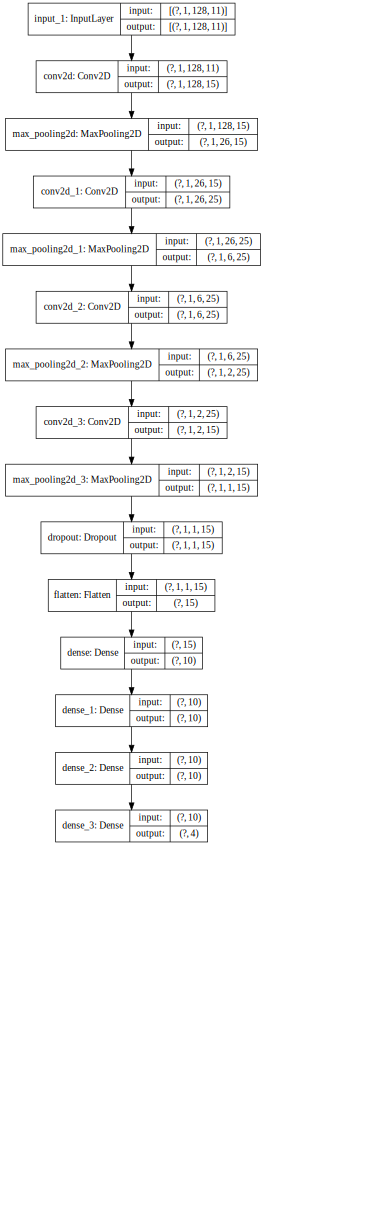

In [0]:

Numero_Datos, uno, alto_2, ancho_2=x_train_1.shape

modelo2 = crearModelo2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer, T_entrada_1 = alto_2 , T_entrada_2 = ancho_2 )

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo2, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 20
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo2.fit(x_train_1, y_train, validation_data=(x_test_1, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 

  #SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))

Train on 299016 samples, validate on 10091 samples
Epoch 1/20
299016/299016 [==============================] - 4s 14us/sample - loss: 0.5800 - sparse_categorical_accuracy: 0.7906 - val_loss: 0.5940 - val_sparse_categorical_accuracy: 0.8790
Epoch 2/20
299016/299016 [==============================] - 4s 14us/sample - loss: 0.5746 - sparse_categorical_accuracy: 0.7920 - val_loss: 0.4970 - val_sparse_categorical_accuracy: 0.9037
Epoch 3/20
299016/299016 [==============================] - 4s 13us/sample - loss: 0.5714 - sparse_categorical_accuracy: 0.7936 - val_loss: 0.6483 - val_sparse_categorical_accuracy: 0.8693
Epoch 4/20
299016/299016 [==============================] - 4s 13us/sample - loss: 0.5654 - sparse_categorical_accuracy: 0.7964 - val_loss: 0.5951 - val_sparse_categorical_accuracy: 0.8803
Epoch 5/20
299016/299016 [==============================] - 4s 13us/sample - loss: 0.5643 - sparse_categorical_accuracy: 0.7977 - val_loss: 0.5611 - val_sparse_categorical_accuracy: 0.8975
Epoc

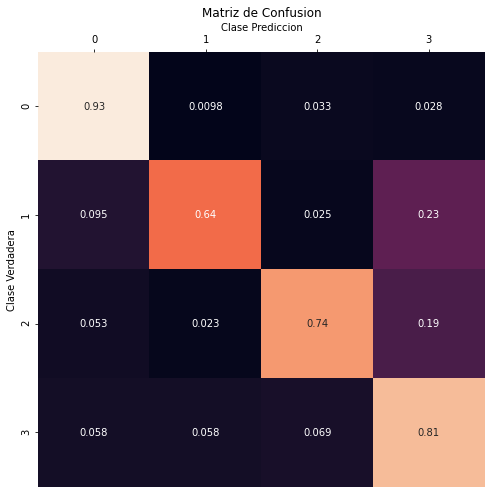

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo2.predict_classes(x_test_1))

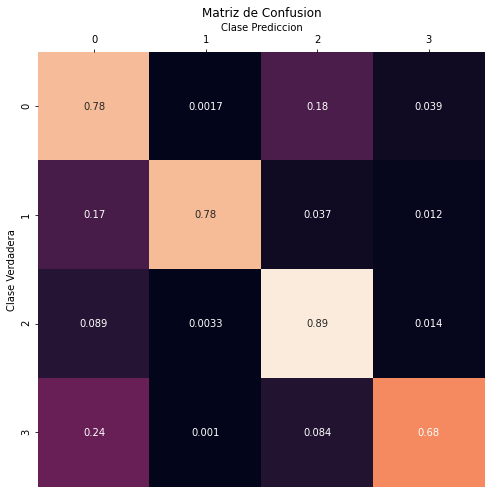

In [0]:
graficarMatrizConfusion(y_true=y, y_pred=modelo2.predict_classes(x2))

### Modelo CNN 2D y 2D

In [0]:
def crearModelo_2D_y_2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer, T_entrada_1, T_entrada_2, T_entrada_3):
  # CONV 1D
  capaEntrada_1 = Input(shape = (T_entrada_3,1))

  capa1_1 = Conv2D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_1)
  pooling1_1 = MaxPooling2D(int(pTamPooling[0]), padding='same')(capa1_1)

  capa2_1 = Conv2D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_1)
  pooling2_1 = MaxPooling2D(int(pTamPooling[1]), padding='same')(capa2_1)
  
  flatten_1 = Flatten()(pooling2_1)

  # CONV 2D
  capaEntrada_2 = Input(shape = (1,T_entrada_1,T_entrada_2))

  capa1_2 = Conv2D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_2)
  pooling1_2 = MaxPooling2D(int(pTamPooling[0]), padding='same')(capa1_2)

  capa2_2 = Conv2D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_2)
  pooling2_2 = MaxPooling2D(int(pTamPooling[1]), padding='same')(capa2_2)
  
  flatten_2 = Flatten()(pooling2_2)


  capas = concatenate([flatten_1, flatten_2])

  capas = Dropout(0.5)(capas)
  
  capas = Dense(pNumNeuronas[0], activation='relu')(capas)
  capas = Dense(pNumNeuronas[1], activation='relu')(capas)

  capaSalida = Dense(4, activation='softmax')(capas)

  #modelo = Sequential()
  modelo = Model(inputs = [capaEntrada_1, capaEntrada_2], outputs = capaSalida)

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([5, 10, 10, 10, 10, 10])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([10, 10, 10, 8, 8, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([5, 5, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([4, 4, 10])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

In [0]:
Numero_Datos, uno, alto_1, ancho_1=x_train_1.shape
Numero_Datos, uno, alto_2, ancho_2=x_train_2.shape

modelo3 = crearModelo_2D_y_2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer,T_entrada_1=alto_2, T_entrada_2=ancho_2, T_entrada_3=ancho_1)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo3, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo3.fit([x_train_1,x_train_2], y_train, validation_data=([x_test_1,x_test_2], y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        


In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

# Pruebas

In [0]:
import timeit

0.00018936300000405026


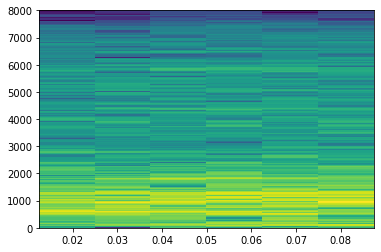

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
start = timeit.timeit()
x,y,ps =  signal.spectrogram(x=frameData[0:1600], fs=fs, window = np.hamming(400), nperseg =400 , nfft = 400, noverlap = int(200) )
S_dB = 10*np.log10(ps)
end = timeit.timeit()

#librosa.display.specshow(S_dB, x_axis='time',
 #                       y_axis='mel', sr=fs,hop_length=int(512/4),
  #                        fmax=8000)

plt.pcolormesh(y,x,S_dB)
hola_1 = (end - start)
print(hola_1)

0.00039489700009198714


0.00020553400008793687

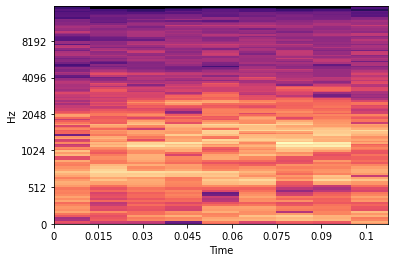

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
start = timeit.timeit()
ps = librosa.feature.melspectrogram(y=frameData[0:1600], sr=fs, n_fft = 400, hop_length = int(200)  )
S_dB = librosa.power_to_db(ps, ref=np.max)
end = timeit.timeit()


hola_2 = (end - start)
librosa.display.specshow(S_dB, x_axis='time',
                        y_axis='mel', sr=fs,hop_length=int(200),
                          fmax=16000)
print(hola_2)
hola_2-hola_1

16000
(13, 81)
[-636.97328165  112.89538908  -55.27235917  -39.35811879  -26.96385187
   14.45549824  -17.89835475   14.50935849  -10.4594912    -2.75587904
  -11.64079737    4.61169338  -23.34611949]
[148.17815613  50.86374099  84.80027241  17.56353333 103.31218257
  39.67582151  38.52561358  55.89333215  26.13029353  23.96737997
  26.78672775  43.68347741  23.70562007]


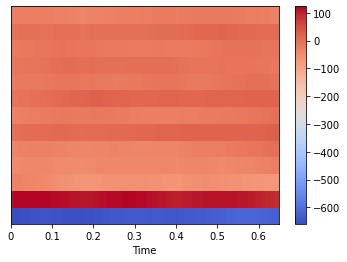

In [0]:
= frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
ps = librosa.feature.mfcc(y=frameData[0:800], sr=fs, n_mfcc=13, n_fft = 490, hop_length = 10, htk=True )
#ps = preprocessing.scale(ps, axis=1)
print(fs)
print(ps.shape)
print (ps.mean(axis=1))
print (ps.var(axis=1))

#S_dB = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(ps, x_axis='time', sr=fs,hop_length=int(512/4))
plt.colorbar()